# Stock Market Pediction

In [2]:
import pandas as pd
df = pd.read_csv('Deep Learning Projects/Stock Prediction/AAPL.csv')


In [3]:
df.head(10)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


In [4]:
df=df[['date','close']]

In [5]:
df['date']

0       2015-05-27 00:00:00+00:00
1       2015-05-28 00:00:00+00:00
2       2015-05-29 00:00:00+00:00
3       2015-06-01 00:00:00+00:00
4       2015-06-02 00:00:00+00:00
                  ...            
1253    2020-05-18 00:00:00+00:00
1254    2020-05-19 00:00:00+00:00
1255    2020-05-20 00:00:00+00:00
1256    2020-05-21 00:00:00+00:00
1257    2020-05-22 00:00:00+00:00
Name: date, Length: 1258, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
    # If already a datetime or date, return as-is
    if isinstance(s, (datetime.datetime, datetime.date)):
        return s
    
    # Otherwise, parse from string
    date_part = s.split(' ')[0]
    year, month, day = map(int, date_part.split('-'))
    return datetime.datetime(year=year, month=month, day=day)


In [7]:
df['date']=df['date'].apply(str_to_datetime)
df['date']

0      2015-05-27
1      2015-05-28
2      2015-05-29
3      2015-06-01
4      2015-06-02
          ...    
1253   2020-05-18
1254   2020-05-19
1255   2020-05-20
1256   2020-05-21
1257   2020-05-22
Name: date, Length: 1258, dtype: datetime64[ns]

In [8]:
df.index=df.pop('date')
df

,close
date,
2015-05-27,132.045
2015-05-28,131.780
2015-05-29,130.280
2015-06-01,130.535
2015-06-02,129.960
...,...
2020-05-18,314.960
2020-05-19,313.140
2020-05-20,319.230


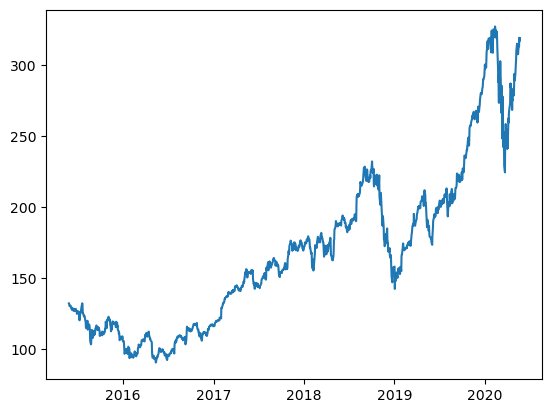

In [9]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['close'])

In [11]:
import numpy as np
import datetime
import pandas as pd  # Make sure this is also imported if you're returning a DataFrame

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    # Create the return DataFrame
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2015-06-01', 
                                '2020-05-22', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2015-06-01,132.045,131.780,130.280,130.535
1,2015-06-02,131.780,130.280,130.535,129.960
2,2015-06-03,130.280,130.535,129.960,130.120
3,2015-06-04,130.535,129.960,130.120,129.360
4,2015-06-05,129.960,130.120,129.360,128.650
...,...,...,...,...,...
1250,2020-05-18,307.650,309.540,307.710,314.960
1251,2020-05-19,309.540,307.710,314.960,313.140
1252,2020-05-20,307.710,314.960,313.140,319.230
1253,2020-05-21,314.960,313.140,319.230,316.850


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1255,), (1255, 3, 1), (1255,))

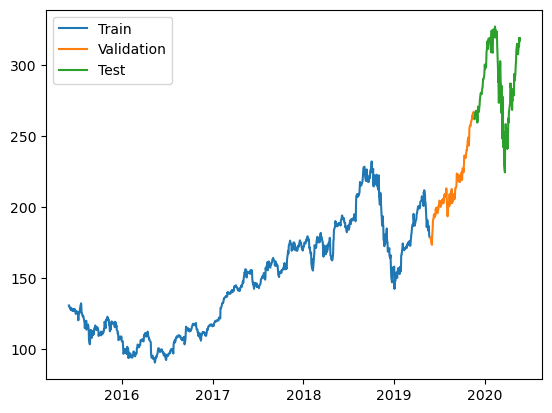

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [21]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 22686.0371 - mean_absolute_error: 146.1254 - val_loss: 44786.8555 - val_mean_absolute_error: 210.4207
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19923.3066 - mean_absolute_error: 136.3681 - val_loss: 36353.9961 - val_mean_absolute_error: 189.3168
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12777.4541 - mean_absolute_error: 105.7581 - val_loss: 15540.7051 - val_mean_absolute_error: 122.5790
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2869.1165 - mean_absolute_error: 41.6411 - val_loss: 4517.3662 - val_mean_absolute_error: 63.3089
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1351.6321 - mean_absolute_error: 31.7449 - val_loss: 5327.5254 - val_mean_absolute_error: 69.4471
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1166.9814 - mean_absolute_error: 29.2674 - val_loss: 4070.9771 - val_mean_absolute_error: 60.1563
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

Epoch 45/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8327 - mean_absolute_error: 2.0493 - val_loss: 119.4343 - val_mean_absolute_error: 6.7378
Epoch 46/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1326 - mean_absolute_error: 1.7894 - val_loss: 113.0155 - val_mean_absolute_error: 6.4048
Epoch 47/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3301 - mean_absolute_error: 2.0547 - val_loss: 124.6952 - val_mean_absolute_error: 7.4058
Epoch 48/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1862 - mean_absolute_error: 1.8742 - val_loss: 116.6626 - val_mean_absolute_error: 6.6346
Epoch 49/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3176 - mean_absolute_error: 1.9578 - val_loss: 122.6045 - val_mean_absolute_error: 7.2955
Epoch 50/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5859 - mean_absolute_error: 1.8326 - val_loss: 113.5570 - val_mean_absolute_error: 6.5313
Epoch 51/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1116 - mean_absolute_error

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8502 - mean_absolute_error: 1.8483 - val_loss: 98.4648 - val_mean_absolute_error: 6.1015
Epoch 90/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0492 - mean_absolute_error: 1.9021 - val_loss: 96.1227 - val_mean_absolute_error: 5.9985
Epoch 91/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4770 - mean_absolute_error: 1.6369 - val_loss: 97.4266 - val_mean_absolute_error: 6.0609
Epoch 92/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8752 - mean_absolute_error: 1.8959 - val_loss: 113.7363 - val_mean_absolute_error: 7.2495
Epoch 93/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1590 - mean_absolute_error: 1.9697 - val_loss: 109.7269 - val_mean_absolute_error: 6.9264
Epoch 94/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5977 - mean_absolute_error: 1.9592 - val_loss: 99.1412 - val_mean_absolute_error: 6.1441
Epoch 95/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6638 - mean_absolute_error: 1.7781 - val_lo

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


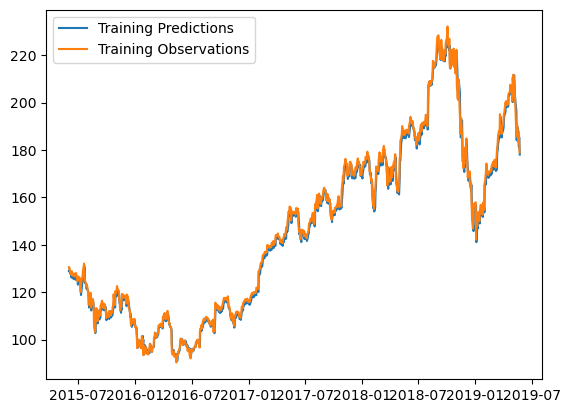

In [22]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


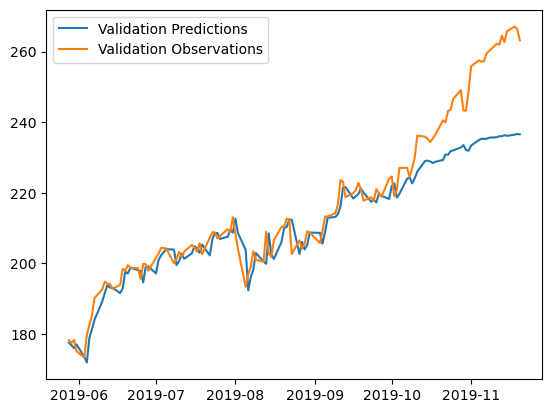

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


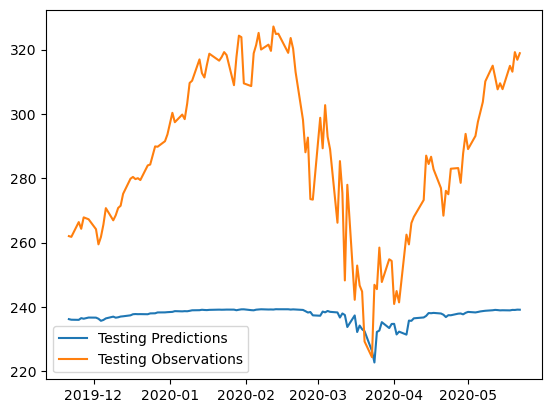

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

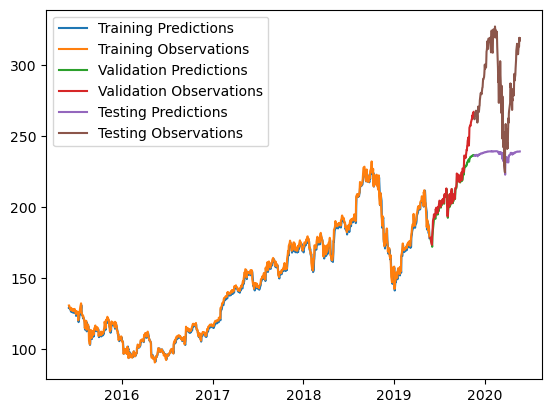

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [26]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


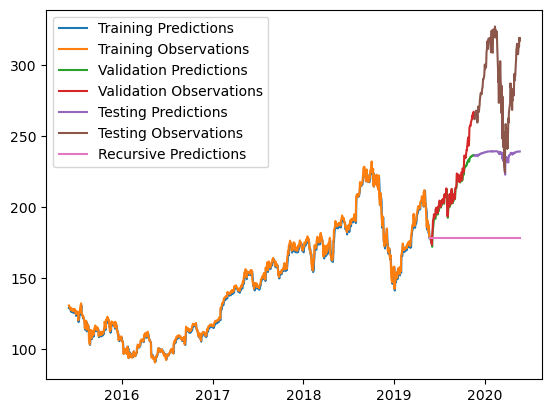

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])